In [7]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=1,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=41,
    hypercube=False,
    class_sep=10
)


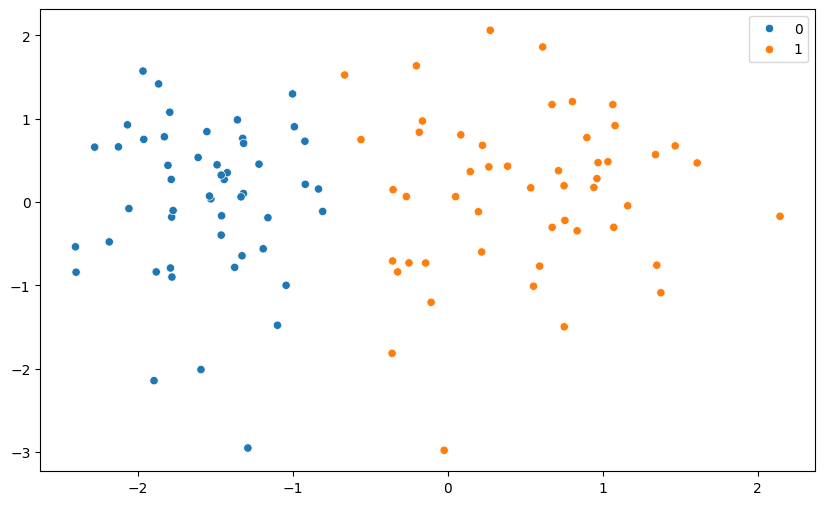

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)
plt.show()

In [17]:
def step(z):
    return 1 if z >= 0 else 0

In [18]:
def perceptron(X, y, lr=0.1, epochs=1000):
    # Add bias column
    X = np.insert(X, 0, 1, axis=1)  
    weights = np.ones(X.shape[1])   # initialize weights

    for i in range(epochs):
        j = np.random.randint(0, len(y))  # pick random sample
        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr * (y[j] - y_hat) * X[j]

    return weights[0], weights[1:]   # bias, feature weights

In [19]:
intercept_,coef_=perceptron(X, y)

In [25]:
print(f'w1 ={coef_[0]} w2 ={coef_[1] }')
print(f'b ={intercept_}')

w1 =1.3968801417288388 w2 =0.0342012950704087
b =1.0


In [27]:
m=-(coef_[0]/coef_[1])
b=-(intercept_/coef_[1])


In [28]:
X_input=np.linspace(-3,3,100)
y_input=m*X_input+b


(-3.0, 2.0)

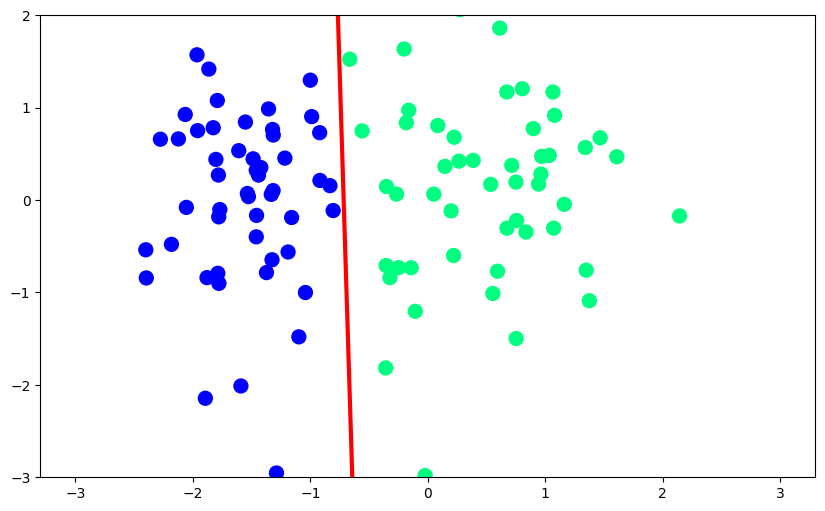

In [31]:
plt.figure(figsize=(10,6))
plt.plot(X_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [32]:
def perceptron_plot(X, y):
    m = []   # slope history
    b = []   # intercept history

    # Add bias column
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(200):
        j = np.random.randint(0, len(y))  # pick random sample
        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr * (y[j] - y_hat) * X[j]

        # store slope and intercept of decision boundary
        m.append(-(weights[1] / weights[2]))
        b.append(-(weights[0] / weights[2]))

    return m, b


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Animation function
def animate_perceptron(X, y, m, b, save=False):
    fig, ax = plt.subplots(figsize=(8,6))

    # scatter plot (ignore bias column if inserted)
    if X.shape[1] == 3:   # bias + 2 features
        ax.scatter(X[:,1], X[:,2], c=y, cmap='winter', s=100, edgecolors='k')
        x_feature = X[:,1]
    else:                 # only 2 features
        ax.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100, edgecolors='k')
        x_feature = X[:,0]

    # x-axis range for line
    x_vals = np.linspace(x_feature.min()-1, x_feature.max()+1, 100)
    line, = ax.plot([], [], 'r-', linewidth=2)

    # update function for animation
    def update(i):
        y_vals = m[i] * x_vals + b[i]
        line.set_data(x_vals, y_vals)
        ax.set_title(f"Iteration: {i+1}")
        return line,

    ani = FuncAnimation(fig, update, frames=len(m), interval=200, repeat=False)

    # Optionally save as GIF
    if save:
        ani.save("perceptron_animation.gif", writer="pillow", fps=5)
        print("Animation saved as perceptron_animation.gif")

    plt.show()
    return ani


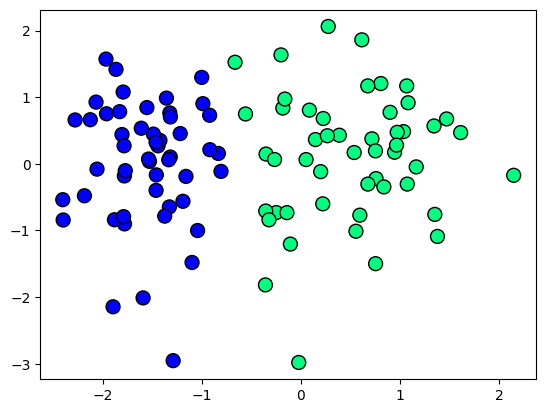

In [51]:
# Train perceptron
m, b = perceptron(X, y)

# Animate
ani = animate_perceptron(X, y, m, b)
